In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
close = 'AVXL'

# Data from Yahoo finance

In [3]:
df_stock = pd.read_excel('AVXL_daily_2020-09-01_2021-09-30.xlsx')
df_stock.head()

,Date,AVXL
0,2020-09-01,4.110
1,2020-09-02,4.190
2,2020-09-03,3.990
3,2020-09-04,3.805
4,2020-09-08,3.800


In [4]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    272 non-null    datetime64[ns]
 1   AVXL    272 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB


# Stock Reports

In [5]:
df_text = pd.read_csv('final_merged_data.csv')
df_text = df_text[['Stock', 'Date', 'content', 'topic']]
df_text.head()

,Stock,Date,content,topic
0,AVXL,9/30/20,new york sept 10 2020 globe newswire anavex li...,anavex life science announces completion anave...
1,AVXL,10/31/20,clinically meaningful dosedependent statistica...,anavex life science announces positive result ...
2,AVXL,11/30/20,statistically significant improvement cdr syst...,proof concept controlled phase 2 clinical tria...
3,AVXL,12/31/20,primary safety pharmacokinetics secondary effi...,anavex life science announces anavex273 blarca...
4,AVXL,1/31/21,new york jan 11 2021 globe newswire anavex lif...,anavex life science receives michael j fox fou...


In [6]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Stock    52 non-null     object
 1   Date     52 non-null     object
 2   content  52 non-null     object
 3   topic    52 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


In [7]:
df_text = df_text[df_text['Stock']==close]
df_text.head()

,Stock,Date,content,topic
0,AVXL,9/30/20,new york sept 10 2020 globe newswire anavex li...,anavex life science announces completion anave...
1,AVXL,10/31/20,clinically meaningful dosedependent statistica...,anavex life science announces positive result ...
2,AVXL,11/30/20,statistically significant improvement cdr syst...,proof concept controlled phase 2 clinical tria...
3,AVXL,12/31/20,primary safety pharmacokinetics secondary effi...,anavex life science announces anavex273 blarca...
4,AVXL,1/31/21,new york jan 11 2021 globe newswire anavex lif...,anavex life science receives michael j fox fou...


In [8]:
df_text['Date'] = pd.to_datetime(df_text['Date'])

<ipython-input-8-4c70ca2ecdb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['Date'] = pd.to_datetime(df_text['Date'])


# Merge

In [9]:
df = df_stock.merge(df_text[['Date', 'content', 'topic']], on = 'Date', how='left')
df.head(25)

,Date,AVXL,content,topic
0,2020-09-01,4.110,NaN,NaN
1,2020-09-02,4.190,NaN,NaN
2,2020-09-03,3.990,NaN,NaN
3,2020-09-04,3.805,NaN,NaN
4,2020-09-08,3.800,NaN,NaN
5,2020-09-09,4.080,NaN,NaN
6,2020-09-10,3.880,NaN,NaN
7,2020-09-11,3.910,NaN,NaN
8,2020-09-14,4.060,NaN,NaN
9,2020-09-15,4.020,NaN,NaN


# Fill Missing using Forward Fill

In [10]:
df['content'] = df['content'].fillna(method='ffill')
df['topic'] = df['topic'].fillna(method='ffill')
df = df.fillna('No Report')
df.head(25)

,Date,AVXL,content,topic
0,2020-09-01,4.110,No Report,No Report
1,2020-09-02,4.190,No Report,No Report
2,2020-09-03,3.990,No Report,No Report
3,2020-09-04,3.805,No Report,No Report
4,2020-09-08,3.800,No Report,No Report
5,2020-09-09,4.080,No Report,No Report
6,2020-09-10,3.880,No Report,No Report
7,2020-09-11,3.910,No Report,No Report
8,2020-09-14,4.060,No Report,No Report
9,2020-09-15,4.020,No Report,No Report


# Train Test Split

In [11]:
training_data_len = math.ceil(len(df)*0.8)
training_data_len

218

In [12]:
train_df = df.iloc[0:training_data_len, :]
train_df.head()

,Date,AVXL,content,topic
0,2020-09-01,4.110,No Report,No Report
1,2020-09-02,4.190,No Report,No Report
2,2020-09-03,3.990,No Report,No Report
3,2020-09-04,3.805,No Report,No Report
4,2020-09-08,3.800,No Report,No Report


In [13]:
test_df = df.iloc[training_data_len-30:, :]
test_df.head()

,Date,AVXL,content,topic
188,2021-06-02,13.01,new york april 12 2021 globe newswire anavex l...,anavex life science report result review indep...
189,2021-06-03,13.54,new york april 12 2021 globe newswire anavex l...,anavex life science report result review indep...
190,2021-06-04,13.57,new york april 12 2021 globe newswire anavex l...,anavex life science report result review indep...
191,2021-06-07,14.64,new york april 12 2021 globe newswire anavex l...,anavex life science report result review indep...
192,2021-06-08,15.23,new york april 12 2021 globe newswire anavex l...,anavex life science report result review indep...


# Preprocessing

In [14]:
# Scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close = scaler.fit_transform(train_df.filter([close]).values)
scaled_close[0:5]

array([[0.01237032],
       [0.01556265],
       [0.00758181],
       [0.00019953],
       [0.        ]])

# Get prices for last 30 days as feature and subsequent data as target

In [15]:
x_train = []
y_train = []

for i in range(30, len(train_df)):
  x_train.append(scaled_close[i-30:i, 0])
  y_train.append(scaled_close[i, 0])

  if i<=30:
    print(x_train)
    print(y_train)

[array([0.01237032, 0.01556265, 0.00758181, 0.00019953, 0.        ,
       0.01117318, 0.00319234, 0.00438947, 0.0103751 , 0.00877893,
       0.0103751 , 0.01556265, 0.0179569 , 0.01157223, 0.0103751 ,
       0.00399043, 0.00279329, 0.00279329, 0.03431763, 0.03511572,
       0.02992818, 0.01715882, 0.0083799 , 0.02274541, 0.02055068,
       0.0245411 , 0.02114924, 0.01995212, 0.02474063, 0.02633679])]
[0.021548291543977277]


# Process content


In [16]:
# Keeping from row 30 onwards
content = train_df.loc[30:,:]['content']

In [17]:
text_len = [len(text.split()) for text in content]

# Get description of text lengths
text_lengths_df = pd.DataFrame(text_len, columns=['Length'])
text_lengths_df.describe()

,Length
count,188.000000
mean,983.143617
std,239.318162
min,695.000000
25%,782.000000
50%,857.000000
75%,1069.000000
max,1677.000000


In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(content)
sequences = tokenizer.texts_to_sequences(content)

# Pad sequences
max_length = 350
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Scale data
scaler_content = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler_content.fit_transform(padded_sequences)

In [19]:
X_train = np.column_stack((x_train, scaled_data))
len(X_train)

188

In [20]:
len(X_train[0])

380

# Prepare Test Data

In [21]:
scaled_close_test = scaler.transform(test_df.filter([close]).values)
scaled_close_test[:5]

array([[0.36751796],
       [0.38866719],
       [0.38986431],
       [0.43256186],
       [0.45610532]])

In [22]:
x_test = []
y_test = []

for i in range(30, len(test_df)):
  x_test.append(scaled_close_test[i-30:i, 0])
  y_test.append(scaled_close_test[i, 0])

  if i<=30:
    print(x_test)
    print(y_test)

[array([0.36751796, 0.38866719, 0.38986431, 0.43256186, 0.45610532,
       0.45690342, 0.46328809, 0.46687948, 0.68595369, 0.54030327,
       0.68874697, 0.69553069, 0.73184353, 0.85275337, 0.7992817 ,
       0.81524338, 0.84357542, 0.8359936 , 1.        , 0.79130083,
       0.76057463, 0.82881082, 0.82920987, 0.85993615, 0.82761374,
       0.87589782, 0.84876294, 0.83000798, 0.86193133, 0.7845171 ])]
[0.732641636591851]


In [23]:
# Keeping from row 30 onwards
test_content = test_df.iloc[30:,:]['content']
test_content.shape

(54,)

In [24]:
test_sequences = tokenizer.texts_to_sequences(test_content)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')
test_scaled_data = scaler_content.fit_transform(test_padded_sequences)

In [25]:
X_test = np.column_stack((x_test, test_scaled_data))
len(X_test)

54

In [26]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

In [27]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(188, 30, 1)

In [28]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(54, 30, 1)

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

188/188 [==============================] - 18s 50ms/step - loss: 0.0139


In [32]:
predictions = model.predict(x_test)

2/2 [==============================] - 1s 16ms/step


In [33]:
predictions = scaler.inverse_transform(predictions)

In [34]:
# Plotting
y_train_plot = scaler.inverse_transform(y_train.reshape(-1, 1))
train_plot = pd.DataFrame()
train_plot['y_train_plot'] = y_train_plot.flatten()
train_plot.reset_index(inplace=True, drop=True)
train_plot.tail()

,y_train_plot
183,25.750000
184,25.070000
185,24.600000
186,25.400000
187,23.459999


In [35]:
y_test_plot = scaler.inverse_transform(y_test.reshape(-1, 1))
test_plot = pd.DataFrame()
test_plot['y_test_plot'] = y_test_plot.flatten()
test_plot['predictions'] = predictions
test_plot.index = range(len(train_plot)+1, len(train_plot)+1+len(test_plot))
test_plot.head()

,y_test_plot,predictions
189,22.160000,27.964622
190,21.680000,27.679743
191,21.549999,27.268822
192,20.959999,26.788544
193,22.670000,26.249300


In [36]:
rmse = np.sqrt(np.mean((test_plot['predictions']-test_plot['y_test_plot'])**2))
rmse

3.2503069464962233

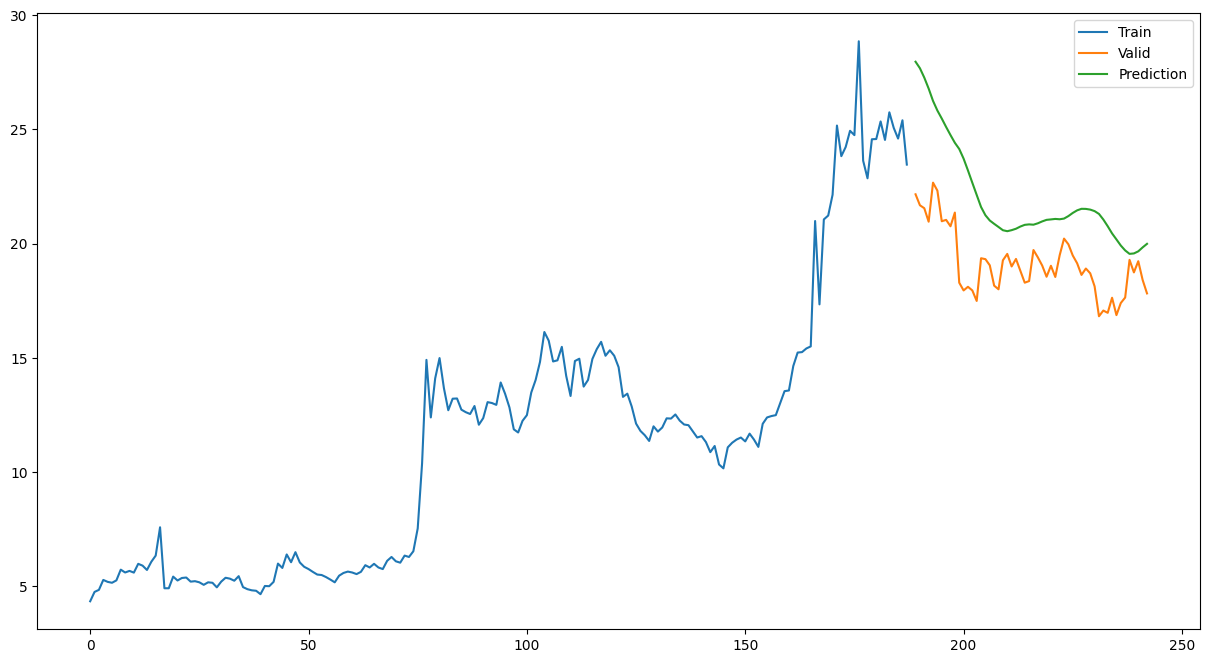

In [37]:
plt.figure(figsize=(15,8))
plt.plot(train_plot)
plt.plot(test_plot[['y_test_plot', 'predictions']])
plt.legend(['Train', 'Valid', 'Prediction'])
plt.show()